# Salary Prediction

## About Dataset

<p>This dataset has total of 6704 rows and 6 columns</p>
<p>1) Age - Age of the employee</p>
<p>2) Gender - Gender of the employee</p>
<p>3) Education Level - Education level of employee</p>
<p>4) Job Title - Job title of the employee</p>
<p>5) Years of Experience - experience of the employee</p>
<p>6) Salary - Salary of the employee</p>

In [1]:
# import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [2]:
# read a csv file
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

In [3]:
# get a quick info about dataset 
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


# Data preprocessing Part 1

In [4]:
# detecting the null values
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
# drop the null values
salary_df.dropna(inplace = True)

In [6]:
# description of data
salary_df.describe()

Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [7]:
# checking the unique values of job title
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [8]:
# checking the value counts 
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [9]:
# creating the variable for reducing the number of job titles
job_title_stats = salary_df['Job Title'].value_counts()
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50]
job_title_stats_less_than_50.count()

153

In [10]:
# reducing the number of job titles
salary_df['Job Title'] = salary_df['Job Title'].apply(lambda x: 'Others' if x in job_title_stats_less_than_50 else x )
salary_df['Job Title'].nunique()

39

In [11]:
# checking unique values in education level 
salary_df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [12]:
salary_df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)

In [13]:
salary_df.Gender.value_counts()
# three genders present in this dataset

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

# Exploratory data analysis

In [14]:
salary_df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD             Others                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's             Others                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

## Distribution of catogorical variables

<Axes: xlabel='Education Level', ylabel='count'>

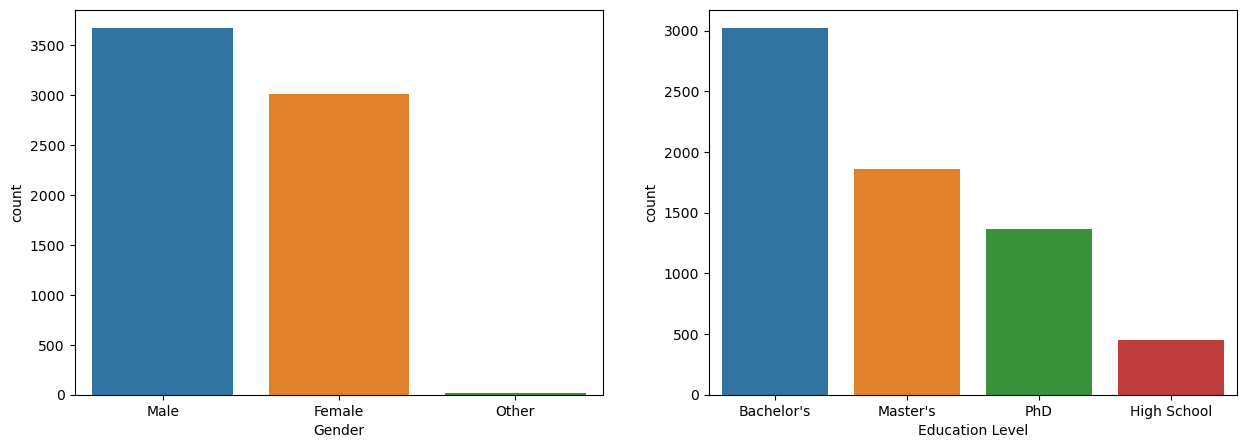

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=salary_df,ax = ax[0])
sns.countplot(x='Education Level',data = salary_df,ax=ax[1])

The first chart reveals that a significant portion of the employees are males, while the second chart indicates that the majority of employees have completed a bachelor's degree.

## Distribution of Continuous variables 

<Axes: xlabel='Salary', ylabel='Count'>

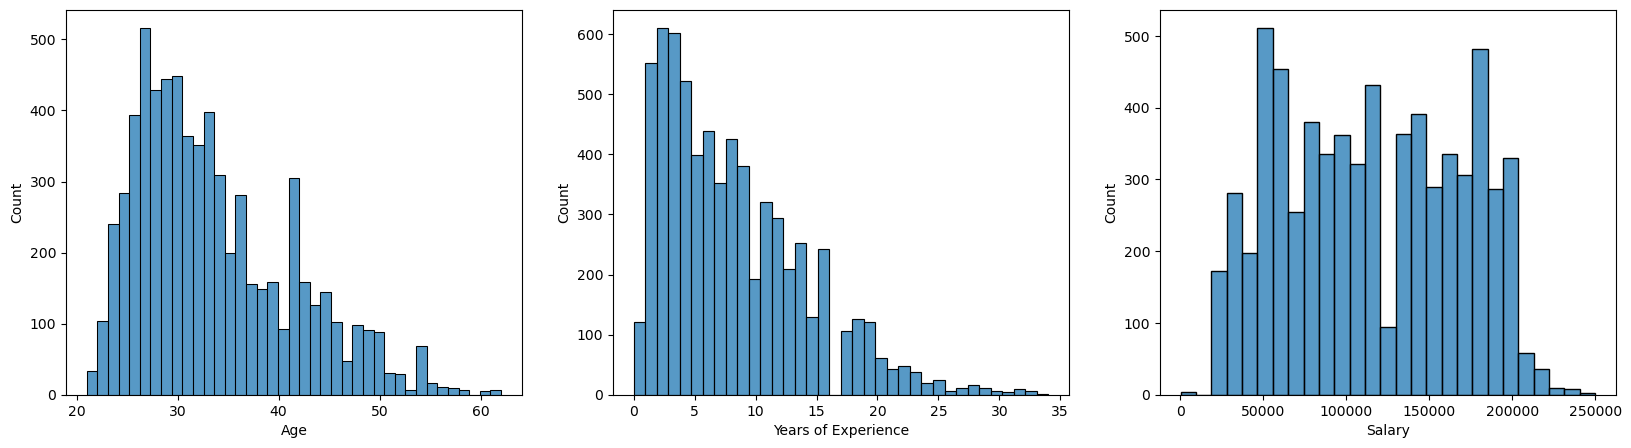

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Age'],ax=ax[0])
sns.histplot(salary_df['Years of Experience'],ax=ax[1])
sns.histplot(salary_df['Salary'],ax=ax[2])

<p>Chart 1 highlights that the majority of employees fall within the 23 to 37 years age range, emphasizing a youthful workforce.</p>

<p>The second chart illustrates employees experience levels with the majority having 1 to 10 years of experience.</p>

<p>The third chart demontrates the salary distribution with most employees earning salaries between 50,000 to 2,00,000.</p>

## Top 10 Highest paid jobs 

[Text(0.5, 1.0, 'Top 10 Highest paid jobs')]

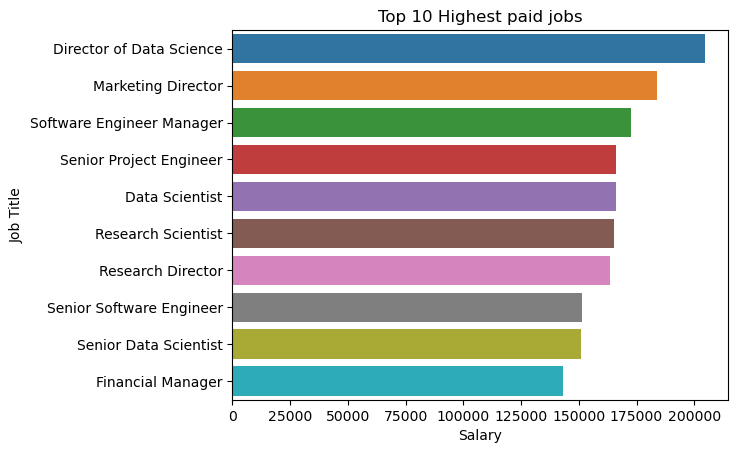

In [17]:
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest paid jobs')

Based on this chart we can know Director of data science gets a highest mean salary

## Relationship with Target variable

[Text(0.5, 1.0, 'Relationship between Education Level and Salary')]

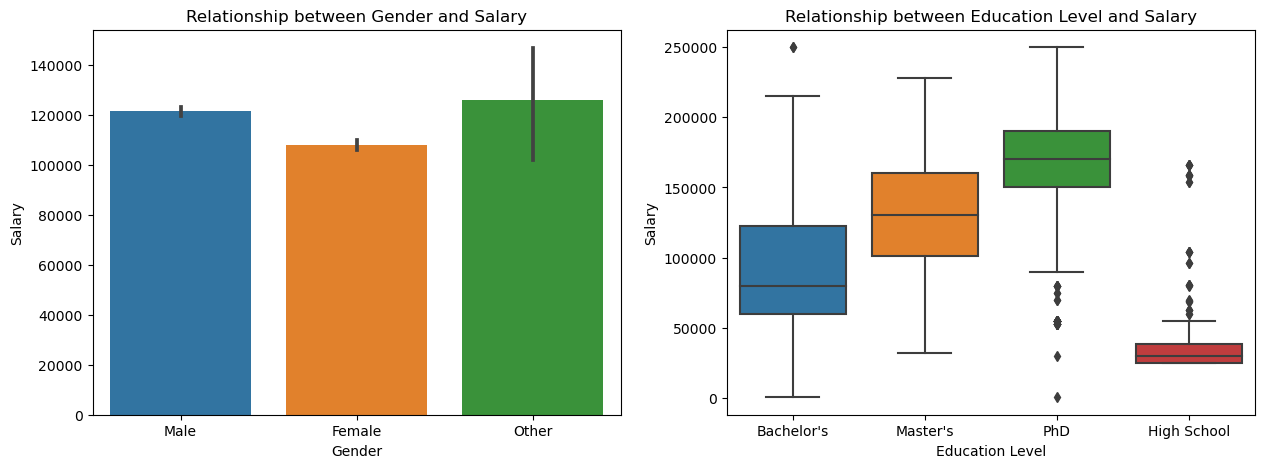

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Gender',y='Salary',data=salary_df,ax=ax[0]).set(title='Relationship between Gender and Salary')
sns.boxplot(x='Education Level',y='Salary',data=salary_df,ax=ax[1]).set(title='Relationship between Education Level and Salary')

<p>In chart 1 demonstrates the salary distribution among the genders. Employees from the other genders get a high salary as compared to the other two genders, but they are very less in count.</p>
<p>Through chart second we can ascertain PhD holders have a high median salary</p> 

[Text(0.5, 1.0, 'Education level vs Salary vs Gender')]

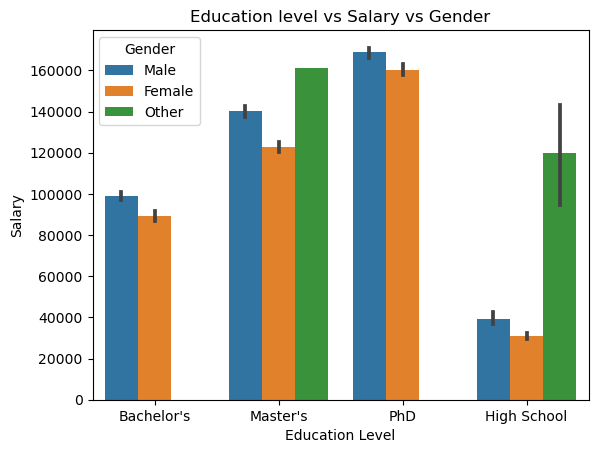

In [19]:
sns.barplot(x='Education Level',y='Salary',data=salary_df,hue='Gender').set(title='Education level vs Salary vs Gender')

This chart shows education level and salary among the genders. In all education level catogory male gets high salary than female. In Master's and High School catogory other gender gets a high salary than males and females. 

[Text(0.5, 1.0, 'Relationship between Age and Salary')]

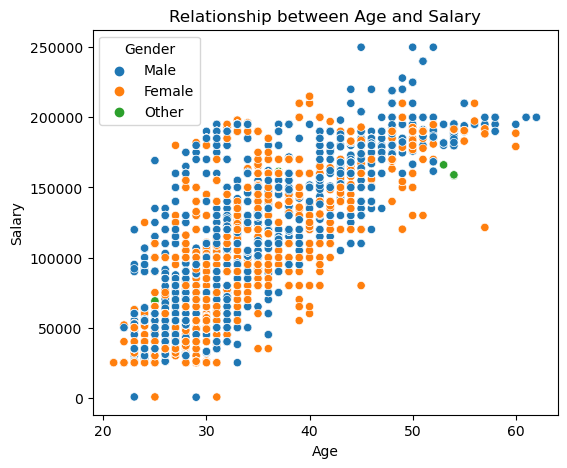

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Age and Salary')

This chart shows relationship between age and salary of employees. It illustrates that as age increases salary also increses. Gender distribution are also equal.

[Text(0.5, 1.0, 'Relationship between Experience and Salary')]

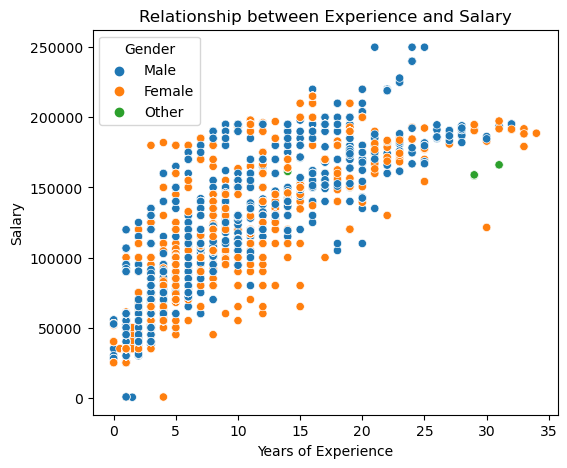

In [21]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Years of Experience',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Experience and Salary')

This chart shows relationship between experience and salary of employees. It illustrates that as experience increases salary also increses. Gender distribution are also same.

# Data Preprocessing Part 2

## Detecting the Outliers

In [22]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [23]:
salary_df[salary_df.Salary>upper]

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []

In [24]:
salary_df[salary_df.Salary<lower]

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []

No outliers found in Salary column

In [25]:
# Mapping Education Level column
education_mapping = {"High School":0,"Bachelor's":1,"Master's":2,"PhD":3}
salary_df['Education Level'] = salary_df['Education Level'].map(education_mapping)

In [26]:
# Label encoding the catogorical variable
le = LabelEncoder()
salary_df['Gender'] = le.fit_transform(salary_df['Gender'])

<Axes: >

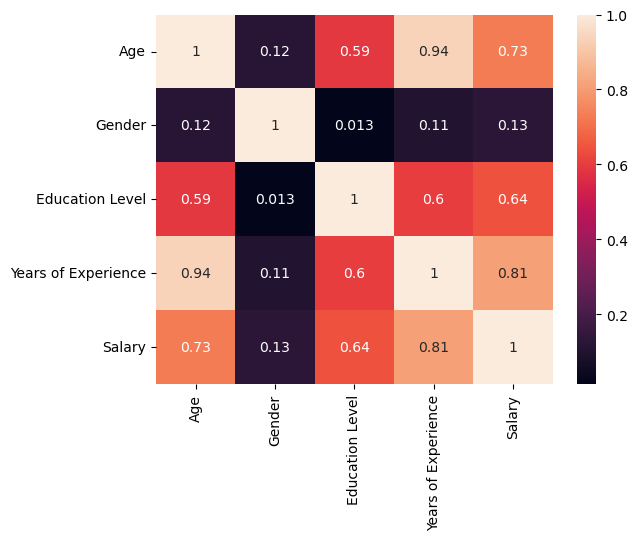

In [27]:
# Correlation plot
sns.heatmap(salary_df.corr(),annot = True)

Through this heatmap we can know age, education level, expereince are highly correlated to the salary.

In [28]:
# Creating dummies for Job titles
dummies = pd.get_dummies(salary_df['Job Title'],drop_first=True)
salary_df = pd.concat([salary_df,dummies],axis=1)

In [29]:
# Drop Job Title column
salary_df.drop('Job Title',inplace=True,axis=1)
salary_df.head()

Age  Gender  Education Level  Years of Experience    Salary  \
0  32.0       1                1                  5.0   90000.0   
1  28.0       0                2                  3.0   65000.0   
2  45.0       1                3                 15.0  150000.0   
3  36.0       0                1                  7.0   60000.0   
4  52.0       1                2                 20.0  200000.0   

   Content Marketing Manager  Data Analyst  Data Scientist  \
0                          0             0               0   
1                          0             1               0   
2                          0             0               0   
3                          0             0               0   
4                          0             0               0   

   Digital Marketing Manager  Director of Data Science  ...  Sales Director  \
0                          0                         0  ...               0   
1                          0                         0  ...               0   
2                          0                         0  ...               0   
3                          0                         0  ...               0   
4                          0                         0  ...               0   

   Sales Manager  Senior Data Scientist  Senior Product Marketing Manager  \
0              0                      0                                 0   
1              0                      0                                 0   
2              0                      0                                 0   
3              0                      0                                 0   
4              0                      0                                 0   

   Senior Project Engineer  Senior Software Engineer  Software Developer  \
0                        0                         0                   0   
1                        0                         0                   0   
2                        0                         0                   0   
3                        0                         0                   0   
4                        0                         0                   0   

   Software Engineer  Software Engineer Manager  Web Developer  
0                  1                          0              0  
1                  0                          0              0  
2                  0                          0              0  
3                  0                          0              0  
4                  0                          0              0  

[5 rows x 43 columns]

In [30]:
# Separate the dataset into features and target
features = salary_df.drop('Salary',axis=1)
target = salary_df['Salary']

## Train Test Split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 42)

## Salary Prediction

In [32]:
# Create a dictionary for hyperparameter tuning
model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [33]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)
    
    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)    

Model                                             Params  \
0  Linear_Regression                                                 {}   
1      Decision_Tree  {'max_depth': 10, 'min_samples_split': 1, 'ran...   
2      Random_Forest                               {'n_estimators': 30}   

       MSE(-ve)  
0 -4.732258e+08  
1 -1.481118e+08  
2 -6.822087e+07

Random Forest model has a lowest neagtive mean squared error which corresponds to the highest positive value of MSE.   

In [34]:
# Order of the best models 
s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

Model                                             Params  \
2      Random_Forest                               {'n_estimators': 30}   
1      Decision_Tree  {'max_depth': 10, 'min_samples_split': 1, 'ran...   
0  Linear_Regression                                                 {}   

       MSE(-ve)  
2 -6.822087e+07  
1 -1.481118e+08  
0 -4.732258e+08

## Model Evaluation

### Random Forest

In [35]:
# Random Forest model
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [36]:
rfr.score(x_test,y_test)

0.9714296129632989

In [37]:
y_pred_rfr = rfr.predict(x_test)

In [38]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))

Mean Squared Error : 81462114.97429907
Mean Absolute Error : 3556.565248531793
Root Mean Squared Error : 9025.63654122517


### Decision Tree

In [39]:
# Decision Tree model
dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=1,random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=1, random_state=0)

In [40]:
dtr.score(x_test,y_test)

0.9434787076679223

In [41]:
y_pred_dtr = dtr.predict(x_test)

In [42]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr,squared=False))

Mean Squared Error : 161157915.3105976
Mean Absolute Error : 7325.361557312708
Root Mean Squared Error : 12694.798750299178


### Linear Regression

In [43]:
# Linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.score(x_test,y_test)

0.8288218169608395

In [45]:
y_pred_lr = lr.predict(x_test)

In [46]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 488076581.17878264
Mean Absolute Error : 16310.3481305285
Root Mean Squared Error : 22092.45529991591


## Conclusion

<p>Among three models it appears that the Random forest model is performing the best in terms of the R2 score and other evaluation metrics used.</p>
<p>==> The Random Forest model is the most accurate among these models, with a accuracy of 97.14%</p>

<p>==> The Decision Tree model also performs well with a accuracy of 94.34%</p>

<p>==> The Linear Regression model has the lowest score, suggesting it may not capture the underlying patterns in the data as effectively as the other models</p>